<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 4: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [1]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.1/476.1 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.7/730.7 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 5.3 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 67.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.8/875.8 KB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.4 MB/s eta 0:00:0

In [2]:
import orbit
import prophet
import sktime

In [3]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


## Задание 1 (2 балла). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекоммендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



In [4]:
!rm -r ./data
!mkdir ./data/
!pip install gdown

!cd ./data && gdown https://drive.google.com/uc?id=1LNDiUOVQzybwiRpfHiBRQmWpyhND2oQD
!cd ./data && gdown https://drive.google.com/uc?id=13NCHFP5RSqzrkGkeNTXYQKXbHJDOQtYd

rm: cannot remove './data': No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1LNDiUOVQzybwiRpfHiBRQmWpyhND2oQD
To: /content/data/HH Spot Price.csv
100% 4.42k/4.42k [00:00<00:00, 4.10MB/s]
Downloading...
From: https://drive.google.com/uc?id=13NCHFP5RSqzrkGkeNTXYQKXbHJDOQtYd
To: /content/data/Nuclear Capacity.csv
100% 118k/118k [00:00<00:00, 47.7MB/s]


In [5]:
# скачаем данные
!wget timeseries1_link
!wget timeseries2_link

--2023-01-13 15:20:34--  http://timeseries1_link/
Resolving timeseries1_link (timeseries1_link)... failed: Name or service not known.
wget: unable to resolve host address ‘timeseries1_link’
--2023-01-13 15:20:34--  http://timeseries2_link/
Resolving timeseries2_link (timeseries2_link)... failed: Name or service not known.
wget: unable to resolve host address ‘timeseries2_link’


Данные скачаны из репозитория: https://github.com/rishabh89007/Time_Series_Datasets

In [6]:
# считаем файлы
ts1 = pd.read_csv('./data/HH Spot Price.csv', sep=',',header=0,names=['year and month','Gas Price'])
ts2 = pd.read_csv('./data/Nuclear Capacity.csv', sep=',',header=0,names=['year, month, day','Nuclear Capacity'])

In [7]:
ts1['year and month'] = pd.to_datetime(ts1['year and month'].str.strip(), format='%Y %m')
ts1['year and month'] = pd.DatetimeIndex(ts1['year and month'])
ts1.set_index('year and month')
# ts1.index = pd.PeriodIndex(ts1['year and month'], freq='M')

,Gas Price
year and month,
1997-01-01,3.45
1997-02-01,2.15
1997-03-01,1.89
1997-04-01,2.03
1997-05-01,2.25
...,...
2020-11-01,2.61
2020-12-01,2.59
2021-01-01,2.71


In [8]:
ts2['year, month, day'] = pd.to_datetime(ts2['year, month, day'].str[:-3], format='%Y %m%d')
ts2['year, month, day'] = pd.DatetimeIndex(ts2['year, month, day'])
ts2.set_index('year, month, day')

,Nuclear Capacity
"year, month, day",
2007-01-01,101764.9
2007-01-02,101764.9
2007-01-03,101764.9
2007-01-04,101764.9
2007-01-05,101764.9
...,...
2021-04-17,96434.9
2021-04-18,96434.9
2021-04-19,96434.9


In [9]:
# сделаем разбиение на train/test
from sklearn.model_selection import train_test_split

X_train_mon, X_test_mon, y_train_mon, y_test_mon = train_test_split(ts1['year and month'], ts1['Gas Price'], test_size=1/3, shuffle=False)
X_train_day, X_test_day, y_train_day, y_test_day = train_test_split(ts2['year, month, day'], ts2['Nuclear Capacity'], test_size=1/5, shuffle=False)

## Задание 2. Анализ временных рядов (1 балла).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики автокорреляционных функций для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

In [10]:
import matplotlib
import matplotlib.dates as mdates

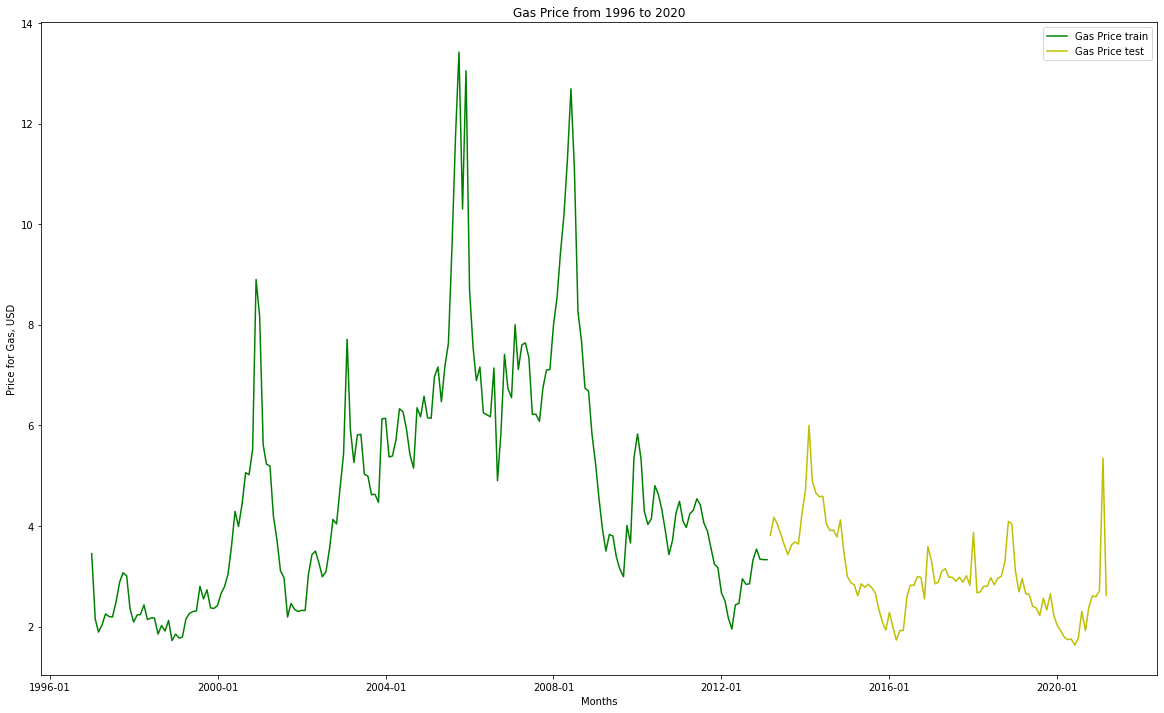

In [11]:
fig, ax = plt.subplots(figsize=(20,12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
df = ts1
ax.plot(X_train_mon, y_train_mon, label='Gas Price train', color='g')
ax.plot(X_test_mon, y_test_mon, label='Gas Price test', color='y')

plt.title('Gas Price from 1996 to 2020')
plt.xlabel('Months')
plt.ylabel('Price for Gas, USD')
plt.legend()
plt.show()

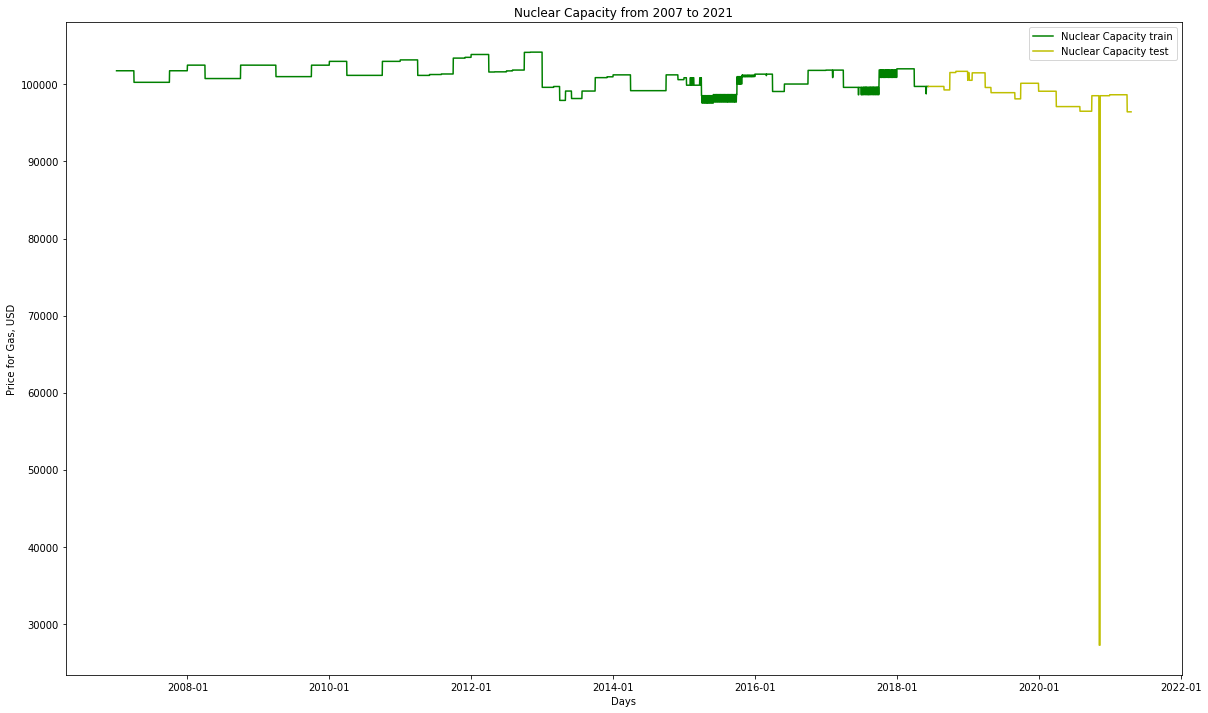

In [12]:
# отрисуем временные ряды
fig, ax = plt.subplots(figsize=(20,12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.plot(X_train_day, y_train_day, label='Nuclear Capacity train', color='g')
ax.plot(X_test_day, y_test_day, label='Nuclear Capacity test', color='y')

plt.title('Nuclear Capacity from 2007 to 2021')
plt.xlabel('Days')
plt.ylabel('Price for Gas, USD')
plt.legend()
plt.show()

In [13]:
from statsmodels.tsa.stattools import acf, pacf

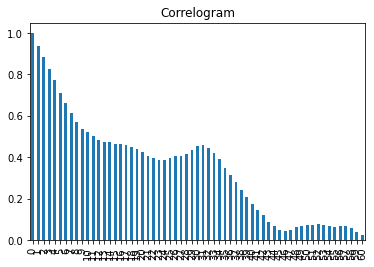

In [14]:
lag_acf = acf(ts1.iloc[:,1], nlags=60, fft=False)
ACF = pd.Series(lag_acf)
ACF.plot(kind = "bar", title = 'Correlogram')

По коррелограмме первого временного ряда мы видим, что четкой сезонности у ряда нет.

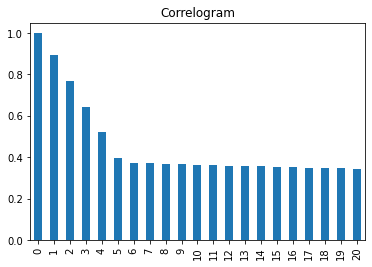

In [15]:
lag_acf = acf(ts2.iloc[:,1], nlags=20, fft=False)
ACF = pd.Series(lag_acf)
ACF.plot(kind = "bar", title = 'Correlogram')

По коррелограмме второго временного ряда можно сказать, что зависимость есть, при этом со временем она убывает очень медленно.

## Задание 3. Предсказание месячного временного ряда (4.5 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.


### NaiveForecaster из sktime (0.5 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [16]:
from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train_mon)

y_pred = forecaster.predict(X_test_mon.index)

In [17]:
from sklearn.metrics import mean_squared_error

# посчитайте метрики на test
mean_squared_error(y_test_mon, y_pred)

0.8167061855670105

In [18]:
forecaster = NaiveForecaster(strategy="mean", window_length=19, sp=1)
forecaster.fit(y_train_mon)

y_pred = forecaster.predict(X_test_mon.index)
mean_squared_error(y_test_mon, y_pred)

0.7164949967158808

### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [19]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

arima = ARIMA(order=(1, 1, 1), seasonal_order=(1,0,0,12))
arima.fit(y_train_mon)
y_pred = arima.predict(X_test_mon.index)
mean_squared_error(y_test_mon, y_pred)
# ваш код обучения моделей здесь

0.7380979010199705

In [20]:
arima = AutoARIMA()
arima.fit(y_train_mon)
y_pred = arima.predict(X_test_mon.index)
mean_squared_error(y_test_mon, y_pred)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.8167061855670105

### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [24]:
from orbit.models.lgt import LGT
from orbit.models.dlt import DLT

train = pd.DataFrame(X_train_mon)
train['Gas Price'] = y_train_mon
lgt = LGT(date_col='year and month', response_col='Gas Price', seasonality=100)
lgt.fit(train)
# ваш код обучения моделей здесь

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [25]:
test = pd.DataFrame(X_test_mon)
test['Gas Price'] = y_test_mon
y_pred = lgt.predict(test)

In [26]:
y_pred

,year and month,prediction_5,prediction,prediction_95
0,2013-03-01,1.540455,2.891130,4.497684
1,2013-04-01,1.189430,3.240685,5.206263
2,2013-05-01,1.097005,2.960018,5.047206
3,2013-06-01,0.232377,2.865644,5.703112
4,2013-07-01,-0.044087,3.508319,6.632172
...,...,...,...,...
92,2020-11-01,0.427914,7.187386,35.991289
93,2020-12-01,-0.185206,7.075785,37.012699
94,2021-01-01,0.064819,7.309329,37.933284
95,2021-02-01,0.375586,7.403747,38.068961


In [27]:
mean_squared_error(y_test_mon, y_pred['prediction'])

6.336924300414099

In [28]:
dlt = DLT(date_col='year and month', response_col='Gas Price', seasonality=100)
dlt.fit(train)
y_pred = dlt.predict(test)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [29]:
y_pred

,year and month,prediction_5,prediction,prediction_95
0,2013-03-01,1.824693,2.936724,4.428452
1,2013-04-01,1.814269,3.290482,5.018181
2,2013-05-01,0.971107,2.984632,4.867112
3,2013-06-01,0.094319,2.686746,5.814126
4,2013-07-01,0.628903,3.147491,6.569256
...,...,...,...,...
92,2020-11-01,-22.316323,2.131169,25.549714
93,2020-12-01,-21.629578,2.464161,24.682163
94,2021-01-01,-21.895021,2.181081,24.934222
95,2021-02-01,-22.375816,1.729212,25.134599


In [30]:
mean_squared_error(y_test_mon, y_pred['prediction'])

0.708023019157649

### ETS (2 балла).

Обучите из библиотеки `sklearn` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [31]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

exp = ExponentialSmoothing(trend='add', seasonal='multiplicative', sp=12)
exp.fit(y_train_mon)
y_pred = exp.predict(X_test_mon.index)
mean_squared_error(y_test_mon, y_pred)

0.7457463355157973

In [32]:
ets = AutoETS(trend='add')
ets.fit(y_train_mon)
y_pred = ets.predict(X_test_mon.index)
mean_squared_error(y_test_mon, y_pred)

0.7461789375521032

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

Лучшим оказалось предсказание NaiveForcaster, поэтому рисую его, хотя график и не такой интересный.

In [33]:
# нарисуйте пресказания
forecaster = NaiveForecaster(strategy="mean", window_length=19, sp=1)
forecaster.fit(y_train_mon)

y_pred = forecaster.predict(X_test_mon.index)

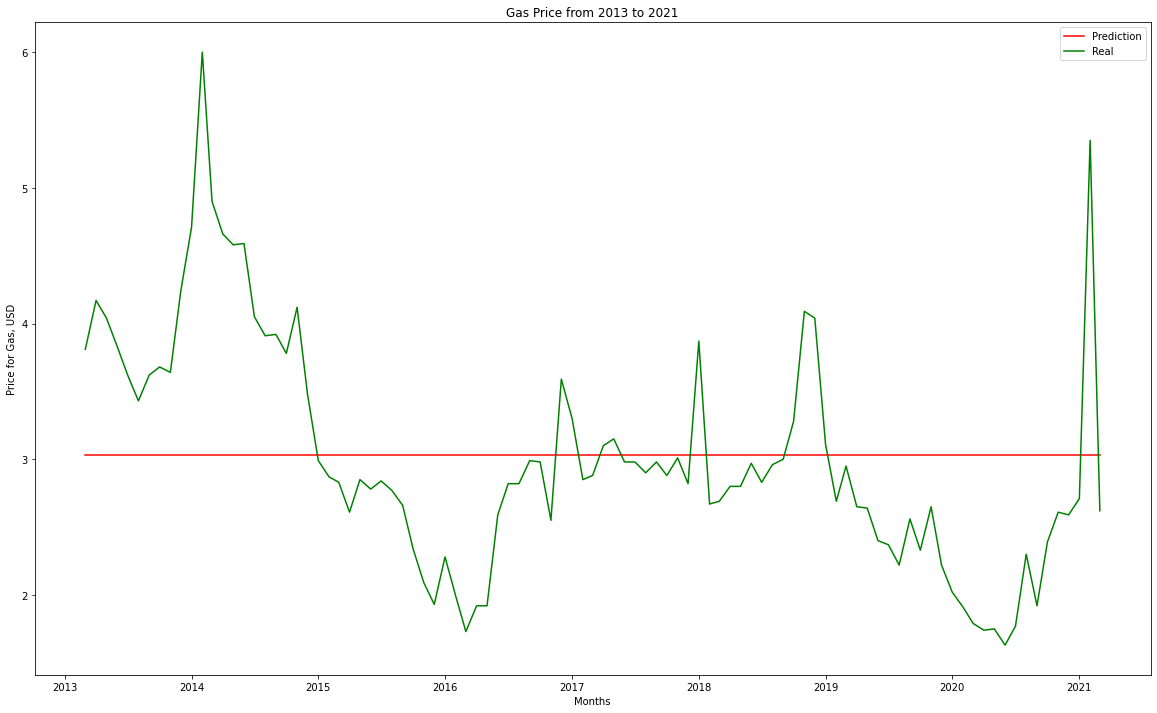

In [34]:
plt.figure(figsize=(20, 12))
plt.plot(X_test_mon,y_pred, label='Prediction', color='r')
plt.plot(X_test_mon,y_test_mon, label='Real', color='g')
plt.title('Gas Price from 2013 to 2021')
plt.xlabel('Months')
plt.ylabel('Price for Gas, USD')
plt.legend()
plt.show()

## Задание 4. Предсказание дневного временного ряда (2.5 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (0.5 балла).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [35]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
forecaster = NaiveForecaster(strategy="last", sp=30)
forecaster.fit(y_train_day)

y_pred = forecaster.predict(X_test_day.index)
mean_squared_error(y_test_day, y_pred)

27807507.97840192

In [36]:
forecaster = NaiveForecaster(strategy="mean", window_length=30, sp=5)
forecaster.fit(y_train_day)

y_pred = forecaster.predict(X_test_day.index)
mean_squared_error(y_test_day, y_pred)

27893231.201906692

### KTR из orbit (1 балл).



In [39]:
from orbit.models.ktrlite import KTRLite

# ваш код обучения моделей здесь
train = pd.DataFrame(X_train_day)
train['Nuclear Capacity'] = y_train_day
ktr = KTRLite(date_col='year, month, day', response_col='Nuclear Capacity', seasonality=365)
ktr.fit(train)

In [40]:
# посчитайте метрики на test
test = pd.DataFrame(X_test_day)
test['Nuclear Capacity'] = y_test_day
y_pred = ktr.predict(test)

In [41]:
y_pred

,"year, month, day",prediction
0,2018-06-12,101011.122527
1,2018-06-13,101011.093224
2,2018-06-14,101011.065614
3,2018-06-15,101011.039725
4,2018-06-16,101011.015585
...,...,...
1040,2021-04-17,101013.981040
1041,2021-04-18,101013.934122
1042,2021-04-19,101013.886087
1043,2021-04-20,101013.836977


In [44]:
mean_squared_error(y_test_day, y_pred['prediction'])

32118611.921981324

### Phophet (1 балл).



In [45]:
from prophet import Prophet

# ваш код обучения моделей здесь
train = pd.DataFrame(X_train_day)
train['Nuclear Capacity'] = y_train_day
train = train.rename(columns={"year, month, day": "ds", "Nuclear Capacity": "y"})
prophet = Prophet()
prophet.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplmgew0_1/r5yf6pzp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplmgew0_1/ta935h48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8340', 'data', 'file=/tmp/tmplmgew0_1/r5yf6pzp.json', 'init=/tmp/tmplmgew0_1/ta935h48.json', 'output', 'file=/tmp/tmplmgew0_1/prophet_modeljtnnt4z1/prophet_model-20230113153025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [46]:
# посчитайте метрики на test
test = pd.DataFrame(X_test_day)
test['Nuclear Capacity'] = y_test_day
test = test.rename(columns={"year, month, day": "ds", "Nuclear Capacity": "y"})
y_pred = prophet.predict(test)

In [47]:
y_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-06-12,100722.688515,99343.787380,100394.450782,100722.688515,100722.688515,-855.273141,-855.273141,-855.273141,28.162185,28.162185,28.162185,-883.435326,-883.435326,-883.435326,0.0,0.0,0.0,99867.415374
1,2018-06-13,100722.843499,99325.862801,100342.949579,100722.843499,100722.843499,-854.088720,-854.088720,-854.088720,29.483124,29.483124,29.483124,-883.571844,-883.571844,-883.571844,0.0,0.0,0.0,99868.754779
2,2018-06-14,100722.998482,99382.637561,100344.548397,100722.998482,100722.998482,-853.576302,-853.576302,-853.576302,32.297889,32.297889,32.297889,-885.874191,-885.874191,-885.874191,0.0,0.0,0.0,99869.422180
3,2018-06-15,100723.153466,99369.561288,100362.088964,100723.153466,100723.153466,-869.485052,-869.485052,-869.485052,20.822726,20.822726,20.822726,-890.307779,-890.307779,-890.307779,0.0,0.0,0.0,99853.668413
4,2018-06-16,100723.308450,99236.060718,100230.630559,100723.308450,100723.308450,-959.296376,-959.296376,-959.296376,-62.516324,-62.516324,-62.516324,-896.780052,-896.780052,-896.780052,0.0,0.0,0.0,99764.012074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,2021-04-17,100883.871409,80980.969156,118524.287898,82032.640634,119501.235019,-1228.842560,-1228.842560,-1228.842560,-62.516324,-62.516324,-62.516324,-1166.326236,-1166.326236,-1166.326236,0.0,0.0,0.0,99655.028849
1041,2021-04-18,100884.026392,80810.175826,118054.468139,82002.394989,119526.965629,-1241.336873,-1241.336873,-1241.336873,-67.411541,-67.411541,-67.411541,-1173.925332,-1173.925332,-1173.925332,0.0,0.0,0.0,99642.689519
1042,2021-04-19,100884.181376,80674.386433,118583.372511,81972.149345,119552.696240,-1155.305298,-1155.305298,-1155.305298,19.161941,19.161941,19.161941,-1174.467239,-1174.467239,-1174.467239,0.0,0.0,0.0,99728.876078
1043,2021-04-20,100884.336359,80899.971658,118312.042590,81941.903700,119578.426850,-1140.421723,-1140.421723,-1140.421723,28.162185,28.162185,28.162185,-1168.583908,-1168.583908,-1168.583908,0.0,0.0,0.0,99743.914636


In [48]:
mean_squared_error(y_test_day, y_pred['yhat'])

31530541.82995533

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

In [51]:
# нарисуйте пресказания
train = pd.DataFrame(X_train_day)
train['Nuclear Capacity'] = y_train_day
ktr = KTRLite(date_col='year, month, day', response_col='Nuclear Capacity', seasonality=365)
ktr.fit(train)
test = pd.DataFrame(X_test_day)
test['Nuclear Capacity'] = y_test_day
y_pred = ktr.predict(test)

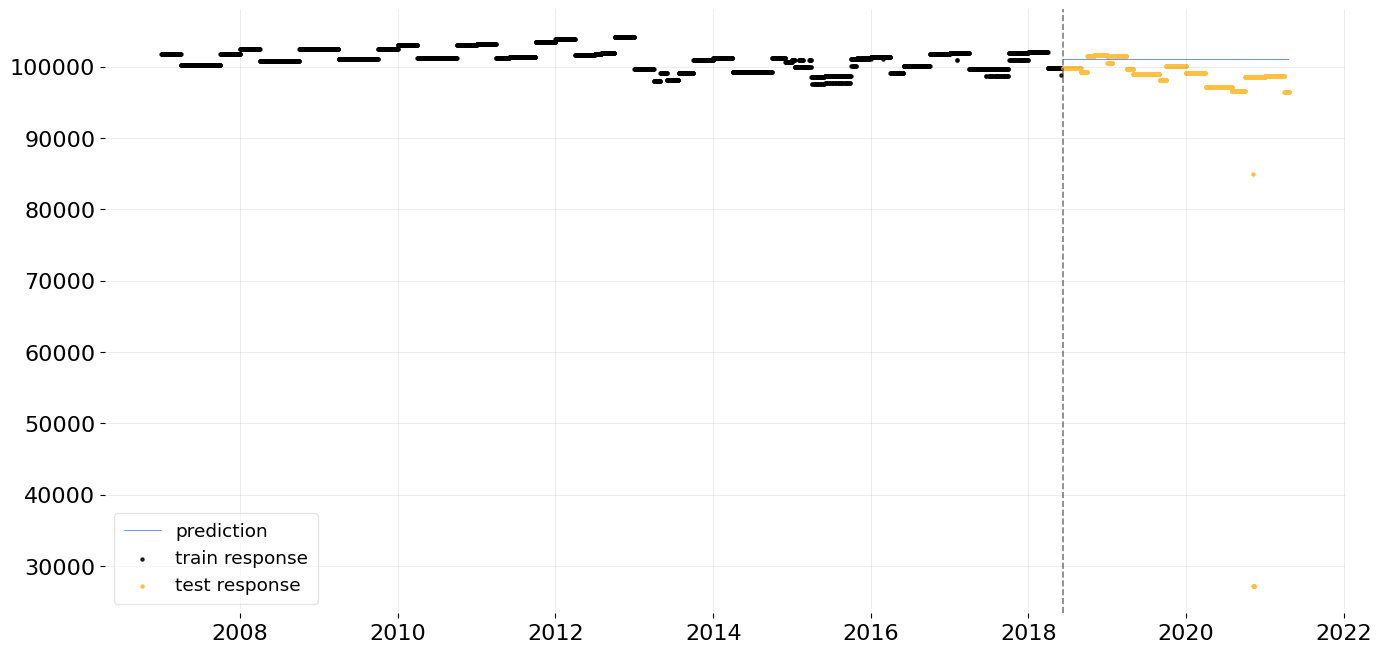

In [52]:
from orbit.diagnostics.plot import plot_predicted_data
_ = plot_predicted_data(training_actual_df=train, predicted_df=y_pred,
                        date_col='year, month, day', actual_col='Nuclear Capacity',
                        test_actual_df=test, markersize=20, lw=.5)

В целом, модель на KTR максимально верно предсказала будущие значения. На графике прямоугольная область - доверительный интервал, линия посередине - среднее предсказание. И как видно, модель не предсказала снижение тренда.